# Regression Case Study: Old car price prediction

Problem Statement: Predict the price of a second hand car based on its features
* Target Variable: price
* Predictor Variables: Age of car, Fuel Type, Kms driven etc.

### Exploring the data

In [1]:
# Reading the dataset
import pandas as pd
import numpy as np
CarPricesData=pd.read_csv('CarPricesData.csv', encoding='latin')
print('Shape before deleting duplicate values:', CarPricesData.shape)

# Removing duplicate rows if any
CarPricesData=CarPricesData.drop_duplicates()
print('Shape After deleting duplicate values:', CarPricesData.shape)

CarPricesData.head()
# Start observing the Quantitative/Categorical/Qualitative variables

Shape before deleting duplicate values: (1436, 10)
Shape After deleting duplicate values: (1435, 10)


,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0


In [2]:
# Looking at the number of rows and columns
CarPricesData.shape

(1435, 10)

In [3]:
# Observing the summarized information of data
# Data types, Missing values etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
CarPricesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1435 non-null   int64  
 1   Age        1433 non-null   float64
 2   KM         1435 non-null   int64  
 3   FuelType   1431 non-null   object 
 4   HP         1435 non-null   int64  
 5   MetColor   1435 non-null   int64  
 6   Automatic  1435 non-null   int64  
 7   CC         1433 non-null   float64
 8   Doors      1435 non-null   int64  
 9   Weight     1433 non-null   float64
dtypes: float64(3), int64(6), object(1)
memory usage: 123.3+ KB


In [4]:
# Looking at the statistial distribution of the data
# Observe that the min values of Age and KM column is an outlier
CarPricesData.describe(include='all')

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
count,1435.000000,1433.000000,1435.000000,1431,1435.000000,1435.000000,1435.000000,1433.000000,1435.000000,1433.000000
unique,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Petrol,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1260,NaN,NaN,NaN,NaN,NaN,NaN
mean,10720.915679,56.020237,68571.782578,NaN,101.491986,0.674564,0.055749,1566.688765,4.032753,1072.314724
std,3608.732978,18.544948,37491.094553,NaN,14.981408,0.468701,0.229517,186.893360,0.952667,52.283038
min,4350.000000,1.000000,1.000000,NaN,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,NaN,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,NaN,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,NaN,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AD67419AC8>]],
      dtype=object)

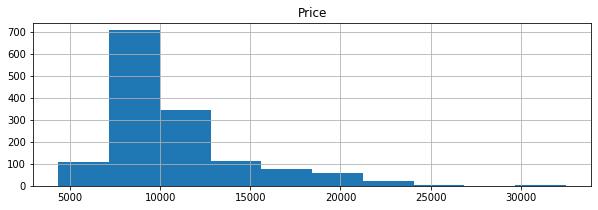

In [5]:
%matplotlib inline
CarPricesData.hist(['Price'], figsize=[10,3])
# Observe the outlier Prices

In [6]:
# Finding unique values for each column
# TO understand which column is categorical and which one is Continuous
CarPricesData.nunique()

Price         236
Age            77
KM           1263
FuelType        3
HP             12
MetColor        2
Automatic       2
CC             12
Doors           4
Weight         59
dtype: int64

In [7]:
CarPricesData.groupby('FuelType').size()

FuelType
CNG         17
Diesel     154
Petrol    1260
dtype: int64

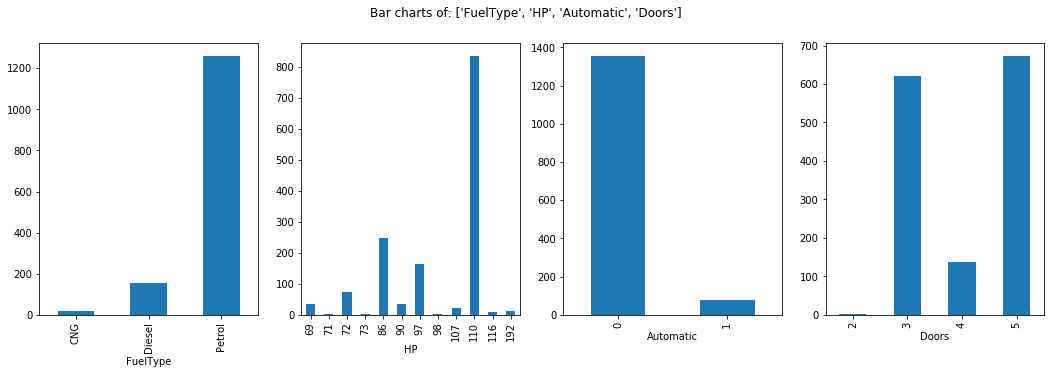

In [8]:
# Plotting multiple bar charts for categorical variables
def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(18,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

# Calling the function
PlotBarCharts(inpData=CarPricesData, colsToPlot=['FuelType', 'HP','Automatic','Doors'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AD6BCBFB48>,
      dtype=object)

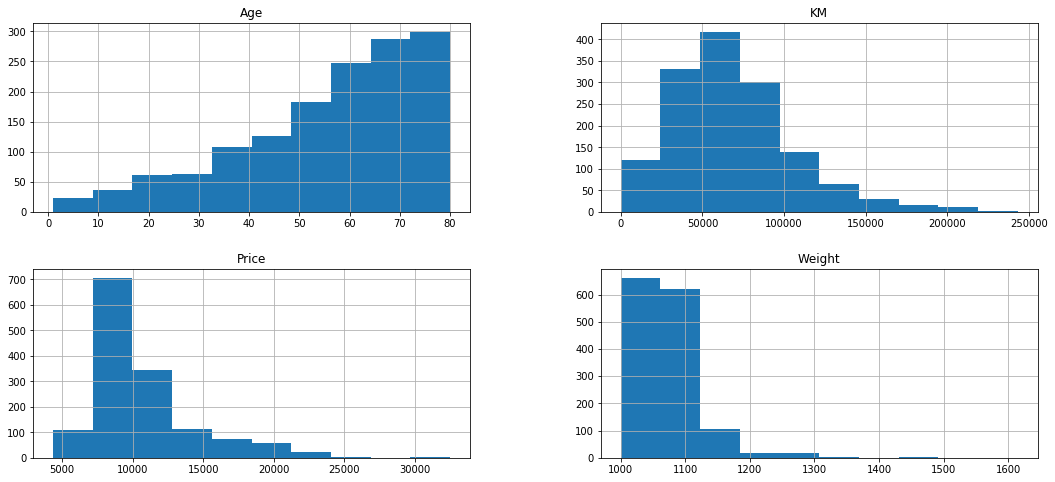

In [9]:
# Plotting histograms of multiple columns together
CarPricesData.hist(['Price','Age', 'KM', 'Weight'], figsize=(18,8))

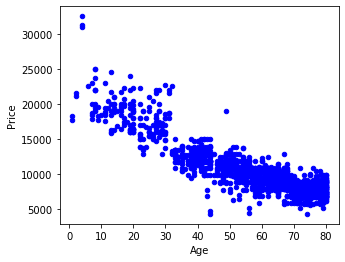

In [10]:
# Taling closer look at the Scatter plot between Price Vs Age
CarPricesData.plot.scatter(x='Age', y='Price', figsize=(5,4), marker='o', color='blue')

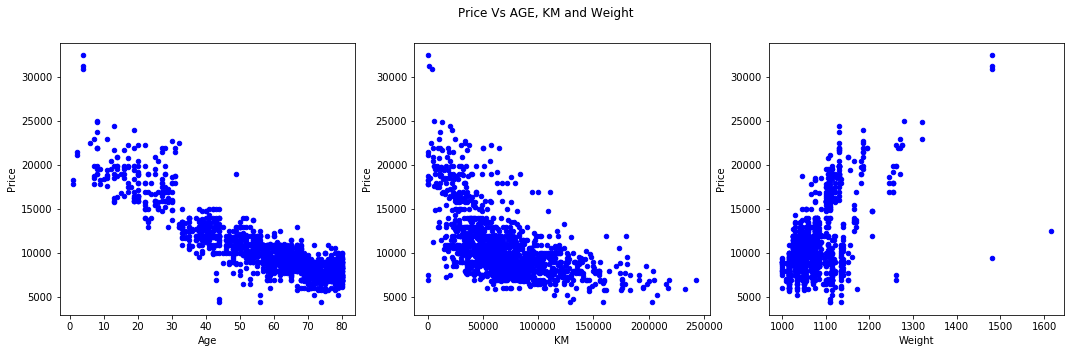

In [11]:
import matplotlib.pyplot as plt

# Generating multiple subplots
fig, subPlot=plt.subplots(nrows=1, ncols=3, figsize=(18,5))

# Creating the super title of the charts
fig.suptitle('Price Vs AGE, KM and Weight')

# Generating multiple scatter charts
CarPricesData.plot.scatter(x='Age', y='Price', marker='o', color='blue', ax=subPlot[0])
CarPricesData.plot.scatter(x='KM', y='Price', marker='o', color='blue', ax=subPlot[1])
CarPricesData.plot.scatter(x='Weight', y='Price', marker='o', color='blue', ax=subPlot[2])

In [12]:
# Finding those rows where price column has outliers
CarPricesData[CarPricesData['Price']>30000]

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
109,32500,4.0,1,Diesel,116,0,0,2000.0,5,1480.0
110,31000,4.0,4000,Diesel,116,1,0,2000.0,5,1480.0
111,31275,4.0,1500,Diesel,116,1,0,2000.0,5,1480.0


In [13]:
# Code to replace the outlier values with a logical value
CarPricesData['Price'][CarPricesData['Price']>30000]=25000
CarPricesData['Price'].describe()

count     1435.000000
mean     10707.135192
std       3540.784461
min       4350.000000
25%       8450.000000
50%       9900.000000
75%      11950.000000
max      25000.000000
Name: Price, dtype: float64

#### Scatter plot after Outlier treatment

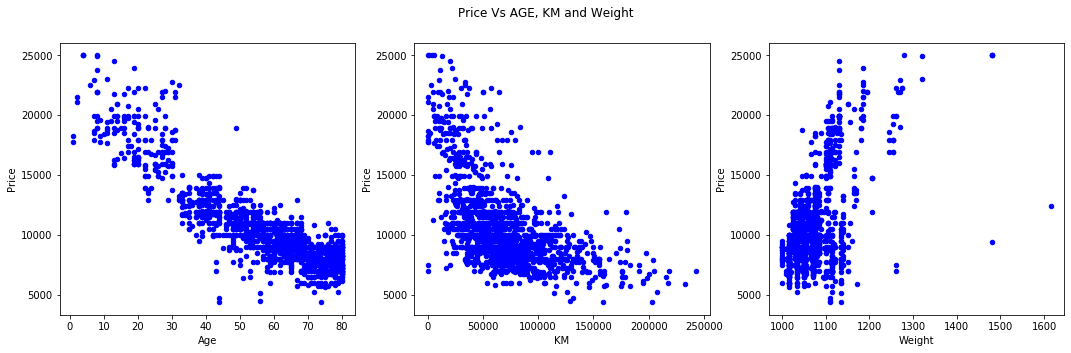

In [14]:
import matplotlib.pyplot as plt

# Generating multiple subplots
fig, subPlot=plt.subplots(nrows=1, ncols=3, figsize=(18,5))

# Creating the super title of the charts
fig.suptitle('Price Vs AGE, KM and Weight')

# Generating multiple scatter charts again after the outlier treatment
CarPricesData.plot.scatter(x='Age', y='Price', marker='o', color='blue', ax=subPlot[0])
CarPricesData.plot.scatter(x='KM', y='Price', marker='o', color='blue', ax=subPlot[1])
CarPricesData.plot.scatter(x='Weight', y='Price', marker='o', color='blue', ax=subPlot[2])

In [15]:
# Creating the correlation matrix
CorrelationData=CarPricesData.corr()
CorrelationData

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
Price,1.000000,-0.881867,-0.573399,0.316391,0.110116,0.035525,0.153260,0.183173,0.556452
Age,-0.881867,1.000000,0.503485,-0.156209,-0.105895,0.030887,-0.130827,-0.147008,-0.465909
KM,-0.573399,0.503485,1.000000,-0.332904,-0.079864,-0.082168,0.305182,-0.035193,-0.024290
HP,0.316391,-0.156209,-0.332904,1.000000,0.058272,0.013313,0.048389,0.091803,0.087472
MetColor,0.110116,-0.105895,-0.079864,0.058272,1.000000,-0.019222,0.034512,0.084796,0.056026
Automatic,0.035525,0.030887,-0.082168,0.013313,-0.019222,1.000000,-0.069324,-0.027492,0.058379
CC,0.153260,-0.130827,0.305182,0.048389,0.034512,-0.069324,1.000000,0.126476,0.650142
Doors,0.183173,-0.147008,-0.035193,0.091803,0.084796,-0.027492,0.126476,1.000000,0.301438
Weight,0.556452,-0.465909,-0.024290,0.087472,0.056026,0.058379,0.650142,0.301438,1.000000


In [16]:
# Filtering only those columns where absolute correlation > 0.5 with Price
CorrelationData['Price'][abs(CorrelationData['Price']) > 0.5 ]

Price     1.000000
Age      -0.881867
KM       -0.573399
Weight    0.556452
Name: Price, dtype: float64

In [17]:
# Grouping by Fuel type to find the aggregated values
GroupedData=CarPricesData.groupby(['FuelType'])

# Printing the aggregated values
#GroupedData.size()#used for distribution
#GroupedData.sum()   #used for corr
#GroupedData.count()#used for distribution
GroupedData.mean()#used for corr 

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
FuelType,,,,,,,,,
CNG,9421.176471,56.352941,117865.588235,110.000000,0.764706,0.058824,1599.882353,4.117647,1097.823529
Diesel,11077.474026,51.000000,112618.649351,78.292208,0.655844,0.000000,1976.396104,4.097403,1157.350649
Petrol,10673.649206,56.629571,62554.623810,104.139683,0.675397,0.061905,1516.058824,4.025397,1061.539746


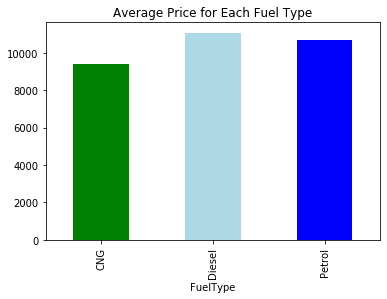

In [18]:
# Creating the graph with Price
GroupedData.mean()['Price'].plot(kind='bar', title='Average Price for Each Fuel Type', color=['green','lightblue','blue'])

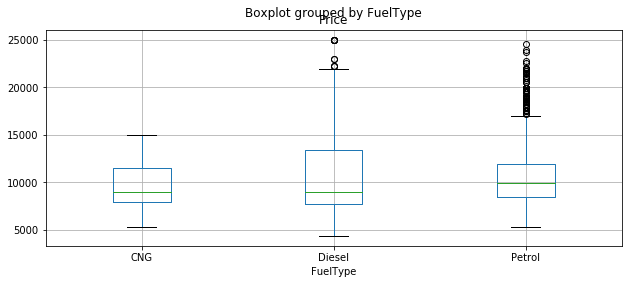

In [19]:
# Looking at the variances in Price by each fuel type in box plot
# IF the distribution of each type is similar, it gives a hint that there is no correlation
# Between the categorical and the numeric variable
CarPricesData.boxplot(column='Price', by='FuelType', figsize=(10,4))

In [20]:
CarPricesData.groupby('FuelType')['Price'].apply(list)

FuelType
CNG       [7750, 11950, 11950, 14950, 12950, 8500, 9250,...
Diesel    [13500, 13750, 13950, 14950, 13750, 12950, 169...
Petrol    [21500, 20950, 19950, 19600, 21500, 22000, 227...
Name: Price, dtype: object

In [21]:
list

list

In [22]:
CarPricesData.groupby('FuelType')['Price'].apply(list)

FuelType
CNG       [7750, 11950, 11950, 14950, 12950, 8500, 9250,...
Diesel    [13500, 13750, 13950, 14950, 13750, 12950, 169...
Petrol    [21500, 20950, 19950, 19600, 21500, 22000, 227...
Name: Price, dtype: object

In [23]:
# f_oneway() function takes the group data as input and returns F-statistic and P-value
from scipy.stats import f_oneway


# Running the one-way anova test between Price and FuelTypes
# Assumption(H0) is that FuelType and Prices are NOT correlated

# Finds out the Prices data for each FuelType as a list
CategoryGroupLists=CarPricesData.groupby('FuelType')['Price'].apply(list)
# Performing the ANOVA test
AnovaResults = f_oneway(*CategoryGroupLists)


# Extreme example when all values are same and the variables are not correlated
#AnovaResults = f_oneway( [10,20], [10,20], [10,20] )

# Extreme example when all the values are different and both variables has correlation
#AnovaResults = f_oneway( [400,500], [7,10], [0.006,0.00001] )

print('P-Value for Anova is: ', AnovaResults[1])

# We accept the Assumption(H0) only when P-Value > 0.05
# Here the P-Value is > 0.05 by a slight margin!! which means we will Accept the Assumption(H0)
# This means Price and Fuel Type are NOT correlated

P-Value for Anova is:  0.13135816358106872


In [24]:
def FunctionAnova(inputData, targetVar, categoricalPredictors):
    from scipy.stats import f_oneway
    for cat in categoricalPredictors:
        CategoryGroupLists=inputData.groupby(cat)[targetVar].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        print(cat+'--> P-Value for Anova is: ', AnovaResults[1])

In [25]:
FunctionAnova(inputData=CarPricesData, targetVar='Price', categoricalPredictors=['FuelType','MetColor'])

FuelType--> P-Value for Anova is:  0.13135816358106872
MetColor--> P-Value for Anova is:  2.9096136376777923e-05


In [26]:
CarPricesData

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69.0,20544,Petrol,86,1,0,1300.0,3,1025.0
1432,10845,72.0,19000,Petrol,86,0,0,1300.0,3,1015.0
1433,8500,71.0,17016,Petrol,86,0,0,1300.0,3,1015.0
1434,7250,70.0,16916,Petrol,86,1,0,1300.0,3,1015.0


### Data Pre-Processing: Treating Missing Values

In [27]:
# Finding out how many missing values are present in each column
CarPricesData.isnull().sum()

Price        0
Age          2
KM           0
FuelType     4
HP           0
MetColor     0
Automatic    0
CC           2
Doors        0
Weight       2
dtype: int64

In [28]:
# Code to delete all the missing values at once
print('Before Deleting missing values:', CarPricesData.shape)
CarPricesDataCleaned=CarPricesData.dropna()
print('After Deleting missing values:', CarPricesDataCleaned.shape)

Before Deleting missing values: (1435, 10)
After Deleting missing values: (1425, 10)


### Example to show how interpolation works :)

In [29]:
import pandas as pd
import numpy as np
# How interpolate works?
s = pd.Series([0, 1, np.nan, 3, 4, 5, 6, np.nan, 8])

s = pd.Series([0, 5, np.nan, 4, 80, 14, 130, np.nan, 10])
s1 = pd.Series(['Petrol', 'Diesel', np.nan, 'Diesel', 'Petrol', 'CNG', 'CNG', np.nan, 'Petrol'])

# For categorical data method= 'pad', 'ffill' , 'bfill' etc is used
#s1.interpolate(method='ffill')

# For numeric data method= 'linear', 'quadratic' etc is used
s.interpolate(method='linear')

0      0.0
1      5.0
2      4.5
3      4.0
4     80.0
5     14.0
6    130.0
7     70.0
8     10.0
dtype: float64

### Treating the missing values of CarPricesData

In [30]:
# Treating missing values in each column

# Replacing by interpolation for a numeric variable
CarPricesData['Age']=CarPricesData['Age'].interpolate(method='linear')

# Replacing with median value a numeric variable
MedianWeight=CarPricesData['Weight'].median()
CarPricesData['Weight']=CarPricesData['Weight'].fillna(value=MedianWeight)

###################################################################################

# Replacing with interpolation for a categorical variable
CarPricesData['FuelType']=CarPricesData['FuelType'].interpolate(method='ffill')

# Replacing with mode value for a categorical variable
ModeCC=CarPricesData['CC'].mode()[0]
CarPricesData['CC']=CarPricesData['CC'].fillna(value=ModeCC)

In [31]:
# Every column must have Zero missing values before you proceed futher
CarPricesData.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

### Data Pre-Processing: Treating Outliers
* Outliers are treated by either deleting them or replacing the outlier values with a logical value as per business and similar data

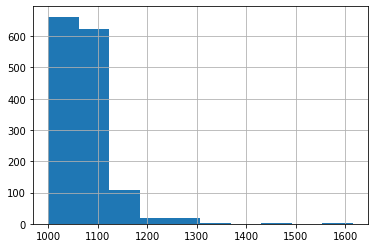

In [32]:
# Looking at the distribution of weight column
CarPricesData['Weight'].hist()

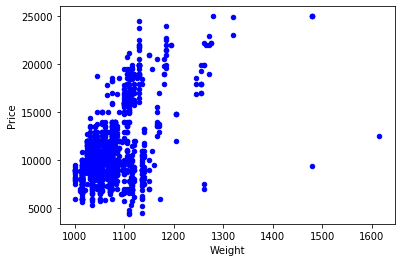

In [33]:
# Looking at the relation with the target column before removing outlier
CarPricesData.plot.scatter(x='Weight', y='Price', marker='o', color='blue')

In [34]:
# Looking at the correlation with target variable before removing outliers
CarPricesData[['Price','Weight']].corr()

,Price,Weight
Price,1.000000,0.556426
Weight,0.556426,1.000000


In [35]:
# Removing the outlier values from data
CarPricesData=CarPricesData[CarPricesData['Weight']<1400]

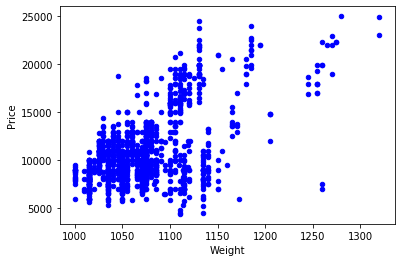

In [36]:
# Plotting again to see the effect of removing outliers
CarPricesData.plot.scatter(x='Weight', y='Price', marker='o', color='blue')

In [37]:
# Removing the outlier values from data
FilterCondition1=CarPricesData['Weight']>1250
FilterCondition2=CarPricesData['Price']<10000

# Printing the outlier rows
print(CarPricesData[FilterCondition1 & FilterCondition2])

RowsToDelete=CarPricesData[FilterCondition1 & FilterCondition2].index
CarPricesData=CarPricesData.drop(RowsToDelete)

     Price   Age      KM FuelType  HP  MetColor  Automatic      CC  Doors  \
601   7500  50.0       1   Diesel  90         1          0  2000.0      3   
654   6950  65.0  114383   Diesel  90         0          0  2000.0      3   

     Weight  
601  1260.0  
654  1260.0  


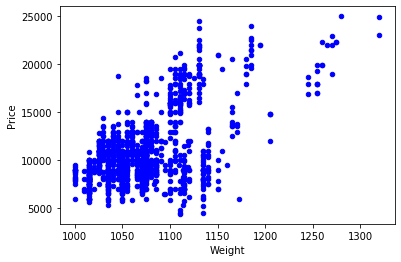

In [38]:
# Plotting again to see the effect of removing outliers
CarPricesData.plot.scatter(x='Weight', y='Price', marker='o', color='blue')

In [39]:
# Correlation increases after outlier removal in data
CarPricesData[['Price','Weight']].corr()

,Price,Weight
Price,1.000000,0.586109
Weight,0.586109,1.000000


In [40]:
# CarPricesData has only one string categorical variable FuelType
# Hence using get_dummies function
CarPricesDataNumeric=pd.get_dummies(CarPricesData)
CarPricesDataNumeric.head()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
0,13500,23.0,46986,90,1,0,2000.0,3,1165.0,0,1,0
1,13750,23.0,72937,90,1,0,2000.0,3,1165.0,0,1,0
2,13950,24.0,41711,90,1,0,2000.0,3,1165.0,0,1,0
3,14950,26.0,48000,90,0,0,2000.0,3,1165.0,0,1,0
4,13750,30.0,38500,90,0,0,2000.0,3,1170.0,0,1,0


### Saving the processed data as pickle file

In [41]:
# Saving the pre-processed data for future reference
CarPricesDataNumeric.to_pickle('CarPricesDataNumeric.pkl')

In [42]:
CarPricesDataNumeric.columns

Index(['Price', 'Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors',
       'Weight', 'FuelType_CNG', 'FuelType_Diesel', 'FuelType_Petrol'],
      dtype='object')